In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import dynamic_inverse_kinematics_objectives, draw_dynamic_solutions
from idea import dynamic_IDEA

In [15]:
rectangles = [((2, 4), (16, 7))]
rectangle_vs = [(-2.3, 0.)]
target = (0., 9.)
target_v = (0., 0.)
S = [2, 5, 7, 3, 2, 5]
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 6

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 120
alpha_inf = 0.7
n_immigrants = 40
eta_c = 3.
eta_m = 15.
p_c = 0.8
p_m = 0.05
num_iterations_init = 60
num_iterations = 100

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 70, best: [1.53085454], #infeasible: 50, best: [3.20805513 1.        ]
Iteration 20, #feasible: 36, best: [2.01427343e-05], #infeasible: 84, best: [0.09495234 1.        ]
Iteration 40, #feasible: 36, best: [4.50245214e-09], #infeasible: 84, best: [0.00569315 1.        ]
Iteration 59, #feasible: 36, best: [2.15854713e-10], #infeasible: 84, best: [0.00334256 1.        ]
t=1
Iteration 0, #feasible: 36, best: [2.15854713e-10], #infeasible: 84, best: [0.00334256 1.        ]
Iteration 20, #feasible: 36, best: [2.15717292e-10], #infeasible: 84, best: [7.96580684e-04 1.00000000e+00]
Iteration 40, #feasible: 36, best: [2.15709488e-10], #infeasible: 84, best: [7.47156859e-04 1.00000000e+00]
Iteration 60, #feasible: 36, best: [2.1570901e-10], #infeasible: 84, best: [7.26964916e-04 1.00000000e+00]
Iteration 80, #feasible: 36, best: [2.15709008e-10], #infeasible: 84, best: [3.61810478e-04 1.00000000e+00]
Iteration 99, #feasible: 36, best: [2.15709007e-10], #infeasible: 8

/home/i291318/Dynamic-inverse-kinematics/simulation.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t = vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 36, best: [0.29207775], #infeasible: 84, best: [4.90482103e-14 1.00000000e+00]
Iteration 40, #feasible: 36, best: [0.19290193], #infeasible: 84, best: [3.96631567e-15 1.00000000e+00]
Iteration 60, #feasible: 36, best: [0.00161965], #infeasible: 84, best: [1.88471041e-16 1.00000000e+00]
Iteration 80, #feasible: 36, best: [0.00161965], #infeasible: 84, best: [1.70028452e-16 1.00000000e+00]
Iteration 99, #feasible: 36, best: [0.00161965], #infeasible: 84, best: [2.06364795e-17 1.00000000e+00]


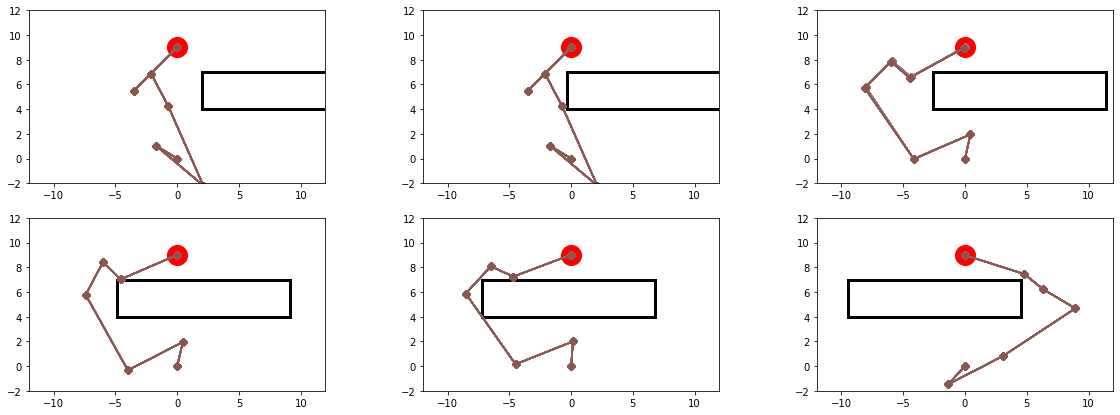

In [16]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=2, ncols=3, figsize=(20, 7), xlim=(-12, 12), ylim=(-2, 12))

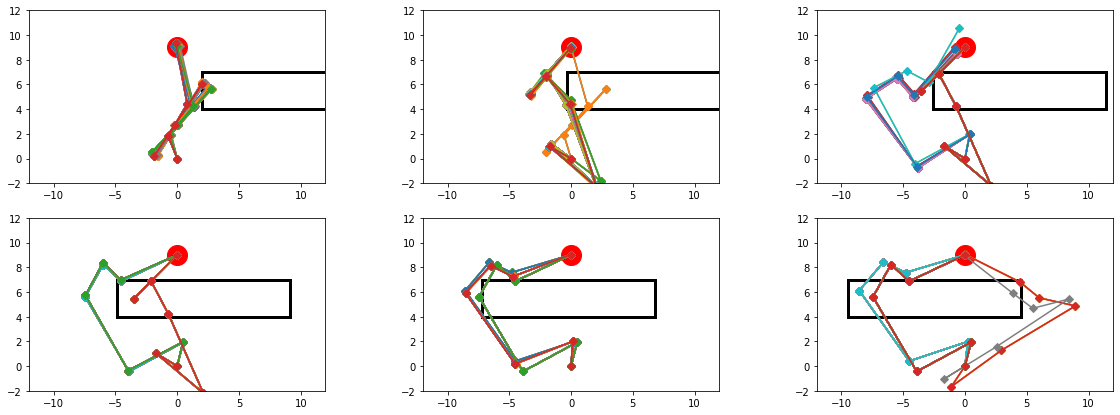

In [17]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=2, ncols=3, figsize=(20, 7), xlim=(-12, 12), ylim=(-2, 12))

In [44]:
rectangles = [((0.4, 2.), (5., 4.)), ((-5., 2.), (-0.8, 4.)), ((-0.5, 2.), (0.1, 4.)),
              ((-5., 5.), (-0.3, 6.)), ((-0.1, 5.), (5., 6.))]
rectangle_vs = [(0., 0.)] * len(rectangles)
target = (1., 8.)
target_v = (-0.25, 0.)
S = ([0.7] * 4 + [0.3] * 2) * 3
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 9

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 0
eta_c = 3.
eta_m = 10.
p_c = 0.9
p_m = 0.02
num_iterations_init = 200
num_iterations = 40

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 230, best: [37.55534708], #infeasible: 370, best: [10.88750518  1.        ]
Iteration 20, #feasible: 120, best: [28.31245453], #infeasible: 480, best: [0.12238255 1.        ]
Iteration 40, #feasible: 120, best: [0.70935372], #infeasible: 480, best: [0.00329467 1.        ]
Iteration 60, #feasible: 120, best: [0.15247489], #infeasible: 480, best: [6.47039317e-05 1.00000000e+00]
Iteration 80, #feasible: 120, best: [0.1118438], #infeasible: 480, best: [5.31597383e-05 1.00000000e+00]
Iteration 100, #feasible: 120, best: [0.10426796], #infeasible: 480, best: [1.34586009e-07 1.00000000e+00]
Iteration 120, #feasible: 120, best: [0.0981855], #infeasible: 480, best: [1.34586009e-07 1.00000000e+00]
Iteration 140, #feasible: 120, best: [0.09686273], #infeasible: 480, best: [4.36686249e-09 1.00000000e+00]
Iteration 160, #feasible: 120, best: [0.09674442], #infeasible: 480, best: [1.19357863e-10 1.00000000e+00]
Iteration 180, #feasible: 120, best: [0.0966307], #infeasible

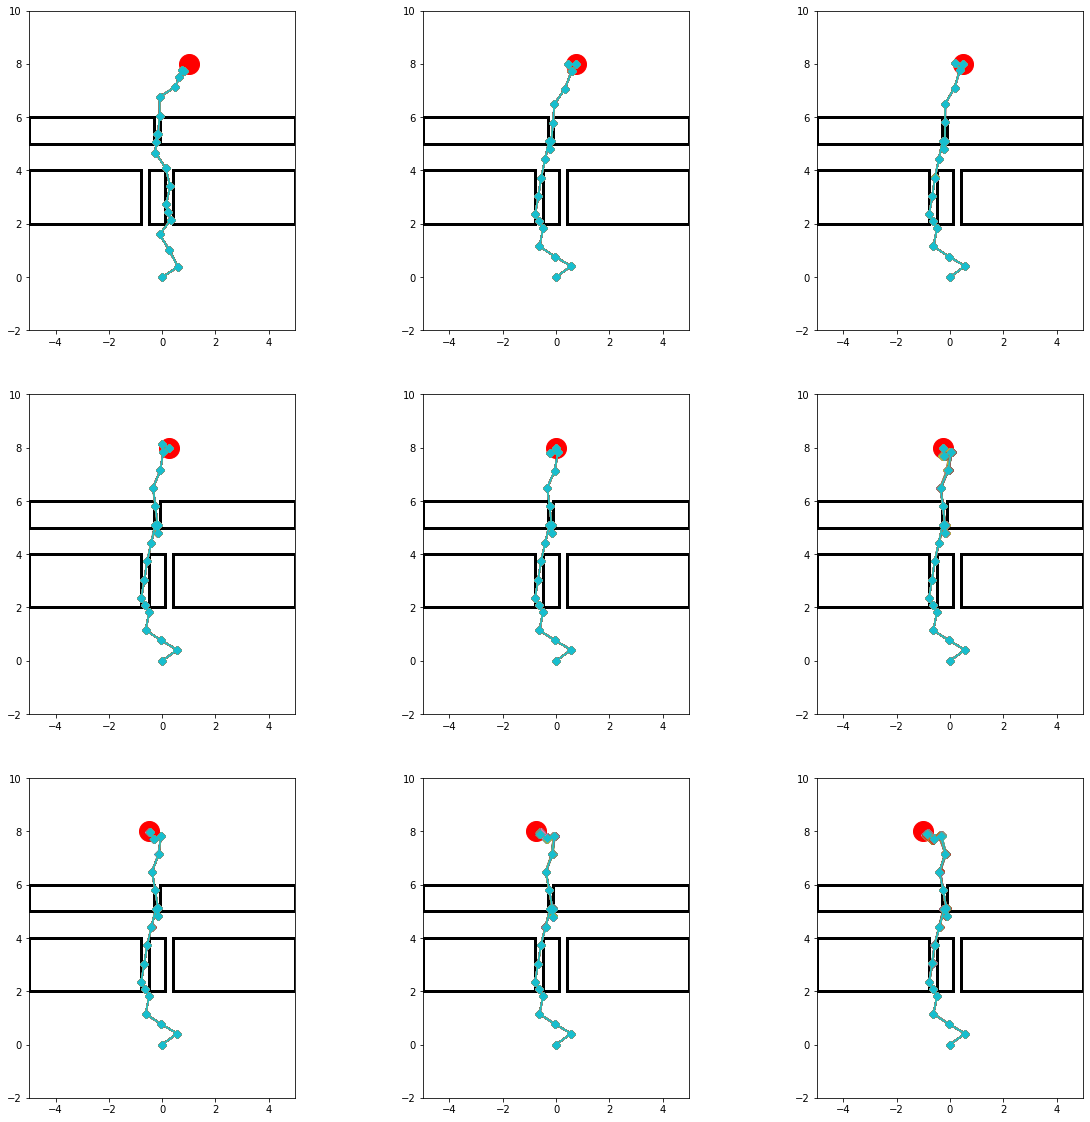

In [45]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20), ylim=(-2, 10), xlim=(-5, 5))

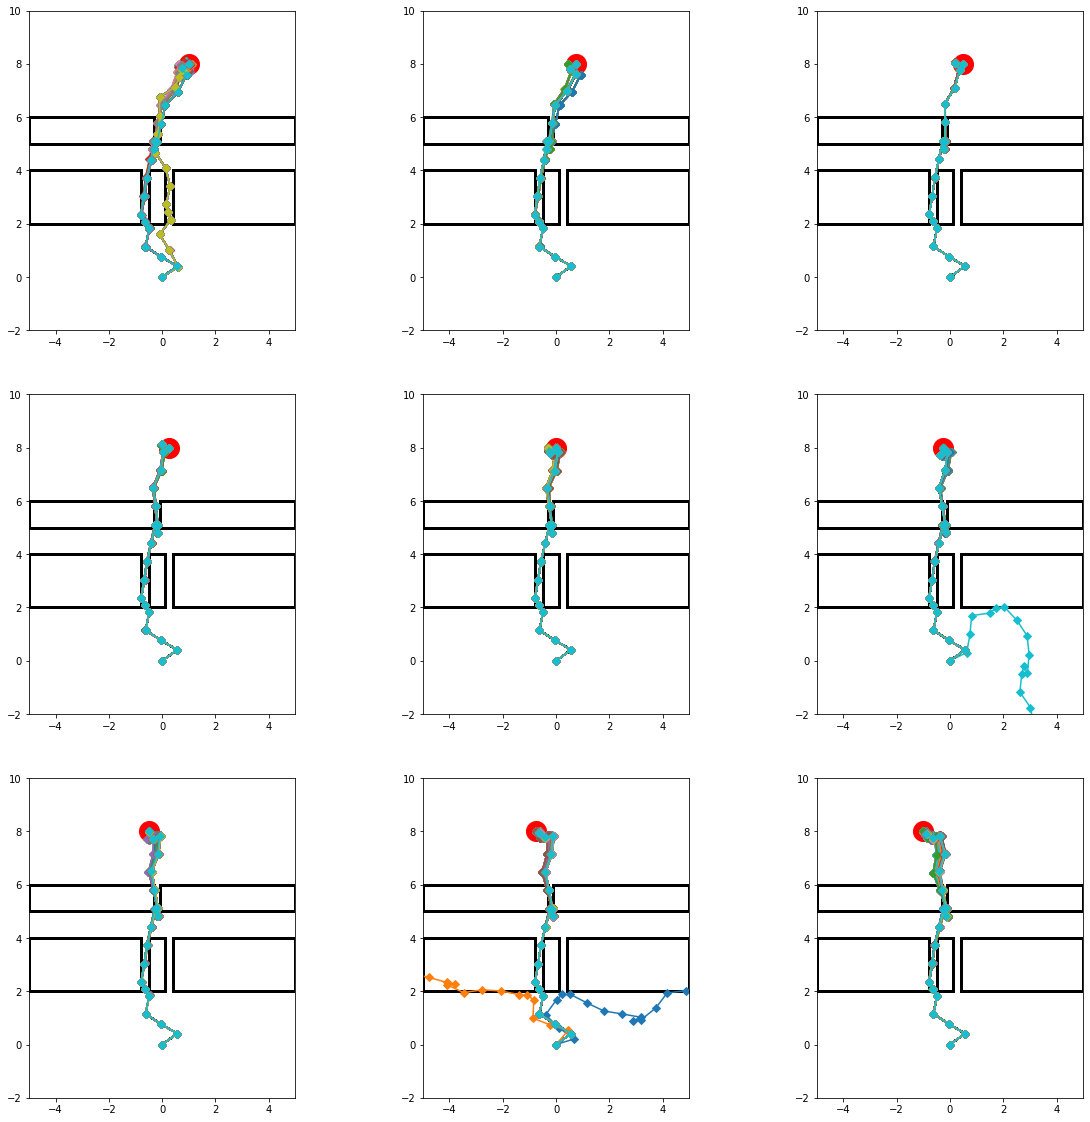

In [46]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20), ylim=(-2, 10), xlim=(-5, 5))

In [48]:
rectangles = [((1.6, 2.), (7., 3.)), ((-7., 2.), (-0.4, 3.)), ((0.1, 2.), (1.1, 3.)),
              ((-7., 4.5), (-1.3, 6.)), ((-0.8, 5.), (7., 6.5))]
rectangle_vs = [(-0.2, 0.)] * 3 + [(0.2, 0.)] * 2
target = (1., 8.)
target_v = (0., 0.)
S = ([0.7] * 4 + [0.5] * 2) * 3
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 300
eta_c = 3.
eta_m = 10.
p_c = 0.9
p_m = 0.02
num_iterations_init = 200
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 294, best: [31.77318049], #infeasible: 306, best: [7.82538425 1.        ]
Iteration 20, #feasible: 120, best: [9.76650557], #infeasible: 480, best: [0.0085267 1.       ]
Iteration 40, #feasible: 120, best: [0.78165703], #infeasible: 480, best: [2.75033571e-04 1.00000000e+00]
Iteration 60, #feasible: 120, best: [0.16441799], #infeasible: 480, best: [1.20164659e-06 1.00000000e+00]
Iteration 80, #feasible: 120, best: [0.09962598], #infeasible: 480, best: [3.05485101e-08 1.00000000e+00]
Iteration 100, #feasible: 120, best: [0.07586977], #infeasible: 480, best: [6.99041488e-09 1.00000000e+00]
Iteration 120, #feasible: 120, best: [0.06838007], #infeasible: 480, best: [5.46375918e-09 1.00000000e+00]
Iteration 140, #feasible: 120, best: [0.05859169], #infeasible: 480, best: [8.86563906e-12 1.00000000e+00]
Iteration 160, #feasible: 120, best: [0.05315396], #infeasible: 480, best: [2.27596461e-12 1.00000000e+00]
Iteration 180, #feasible: 120, best: [0.05175656], #infe

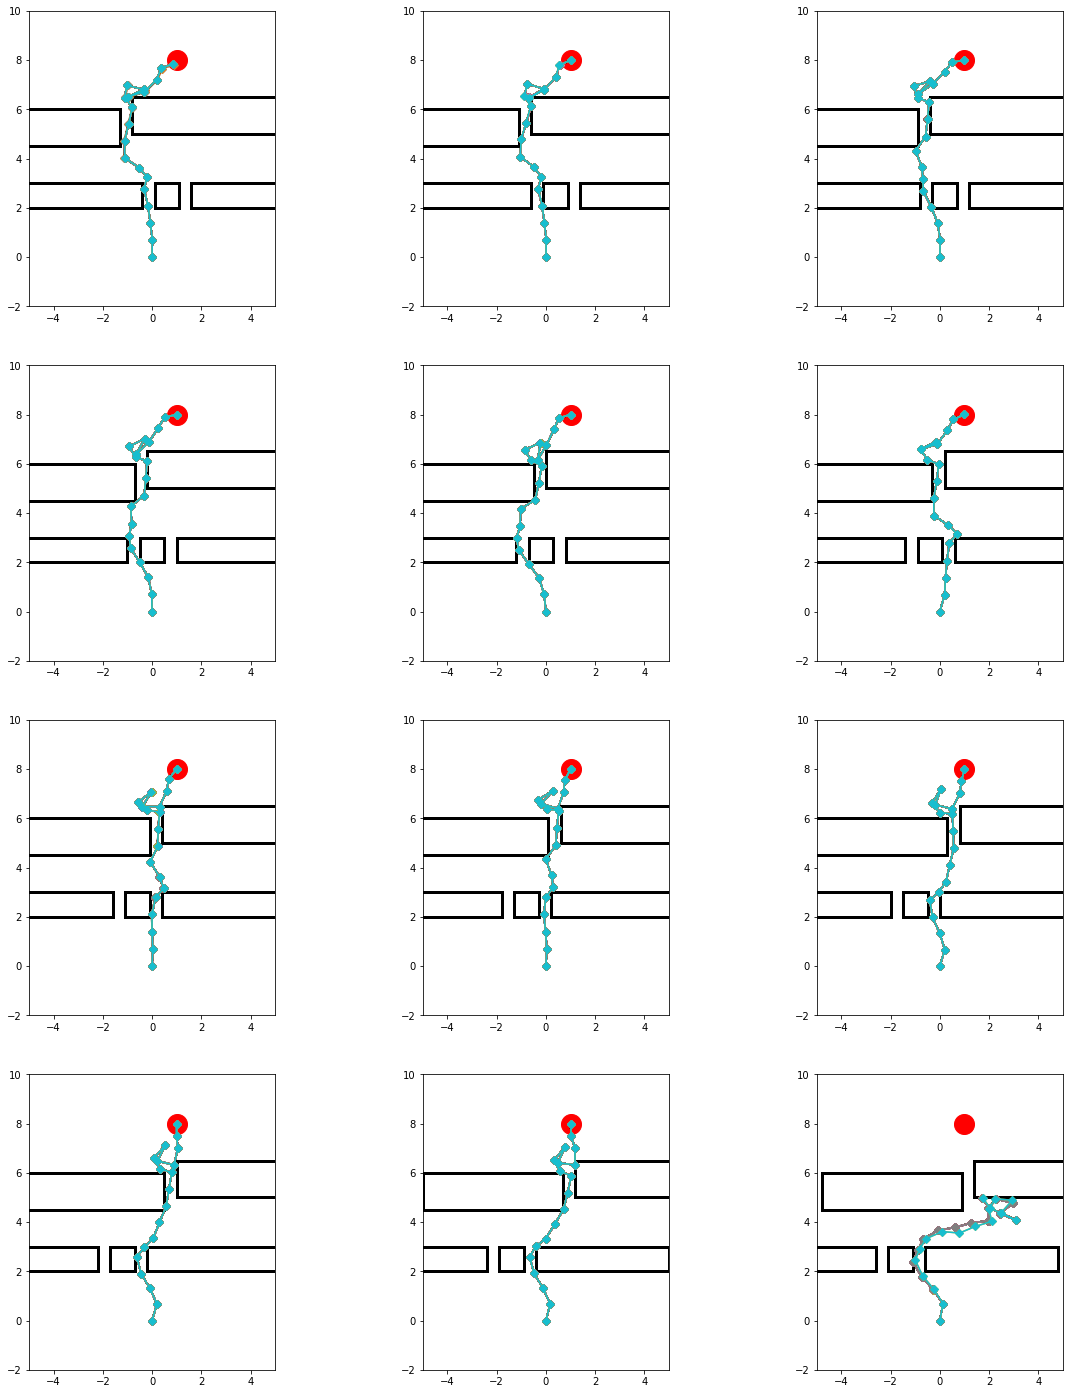

In [49]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

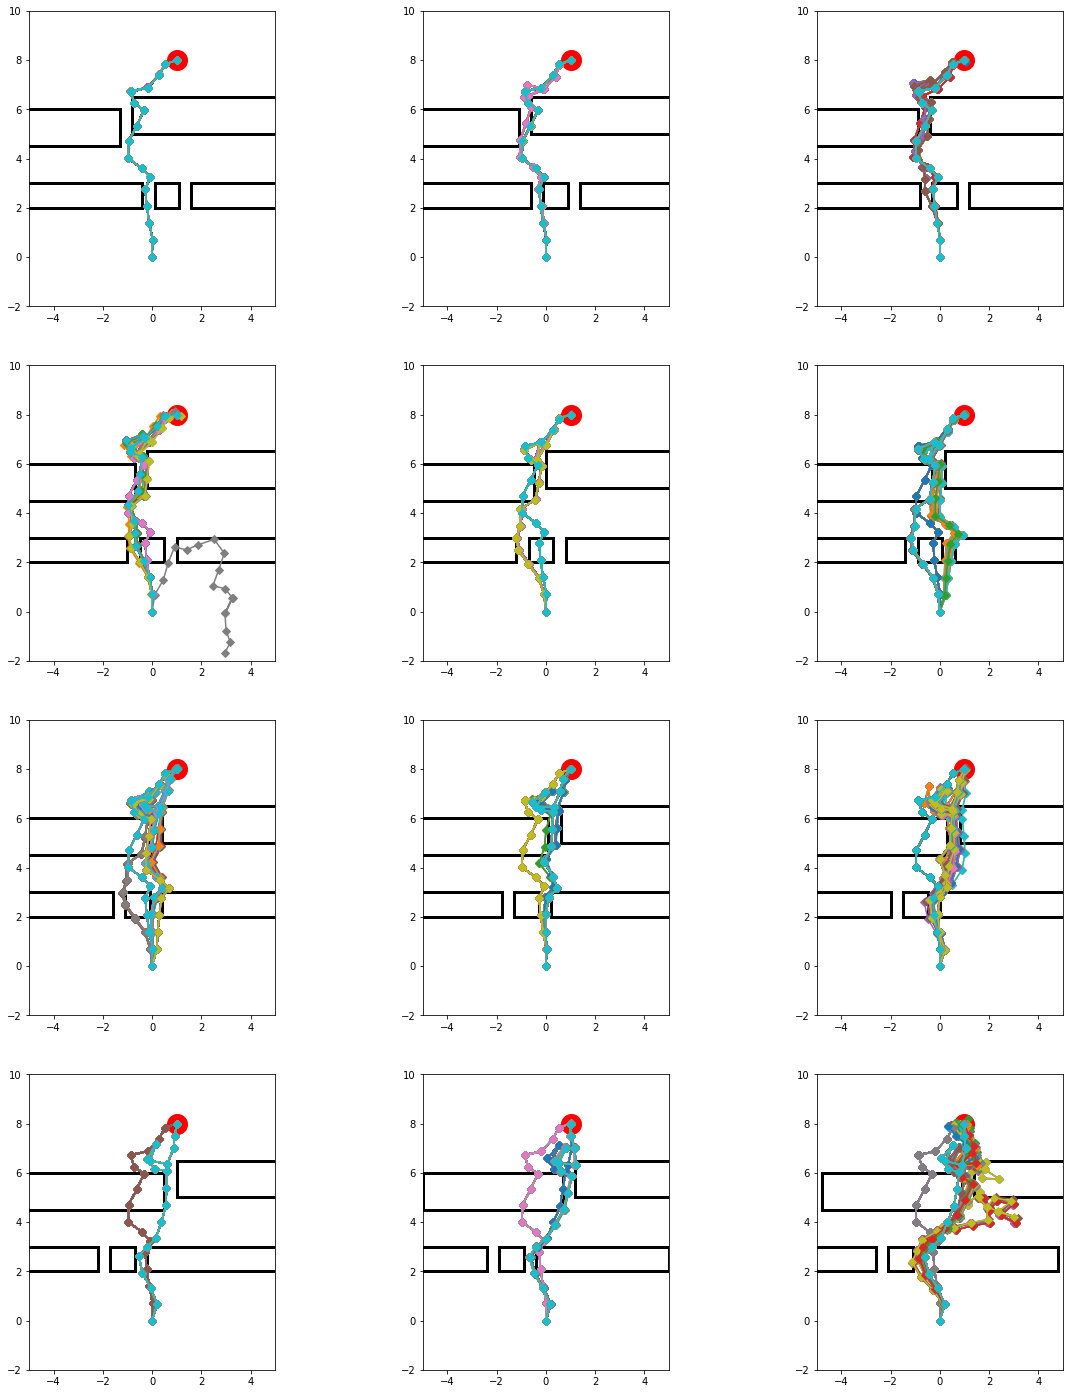

In [50]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(0-2, 10))

In [ ]:
rectangles = [((1.6, 2.), (7., 3.)), ((-7., 2.), (-0.4, 3.)), ((0.1, 2.), (1.1, 3.)),
              ((-7., 4.5), (-1.3, 6.)), ((-0.8, 5.), (7., 6.5))]
rectangle_vs = [(-0.2, 0.)] * 3 + [(0.2, 0.)] * 2
target = (3., 8.)
target_v = (-0.5, 0.)
S = [1.] * 15
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 300
eta_c = 3.
eta_m = 10.
p_c = 0.9
p_m = 0.02
num_iterations_init = 200
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

In [ ]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

In [ ]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

In [ ]:
rectangles = [((i - 0.25, 5), (i + 1.25, 7)) for i in range(-9, 10, 2)] + [((i - 0.25, 2), (i + 1.25, 3)) for i in range(-9, 10, 2)]
rectangle_vs = [(-0.4, 0)] * (len(rectangles) // 2) + [(0.4, 0)] * (len(rectangles) // 2)
target = (3., 8.5)
target_v = (-0.5, -0.1)
S = [1.] * 15
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 100
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.1
num_iterations_init = 160
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

In [ ]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

In [ ]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

t=0


/home/i291318/Dynamic-inverse-kinematics/simulation.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t = vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 120, best: [11.25565457], #infeasible: 480, best: [0.9053099 1.       ]
Iteration 20, #feasible: 120, best: [4.75161456], #infeasible: 480, best: [0.00213855 1.        ]
Iteration 40, #feasible: 120, best: [0.00283111], #infeasible: 480, best: [1.69285247e-06 1.00000000e+00]
Iteration 60, #feasible: 120, best: [0.00045813], #infeasible: 480, best: [7.09774802e-07 1.00000000e+00]
Iteration 80, #feasible: 120, best: [5.98130273e-07], #infeasible: 480, best: [5.44000744e-10 1.00000000e+00]
Iteration 100, #feasible: 120, best: [1.78833974e-08], #infeasible: 480, best: [7.32792423e-12 1.00000000e+00]
Iteration 120, #feasible: 120, best: [1.78833974e-08], #infeasible: 480, best: [8.6273891e-16 1.0000000e+00]
Iteration 140, #feasible: 120, best: [1.78833974e-08], #infeasible: 480, best: [1.89247271e-16 1.00000000e+00]
Iteration 160, #feasible: 120, best: [1.78833974e-08], #infeasible: 480, best: [1.89247187e-16 1.00000000e+00]
Iteration 180, #feasible: 120, best: [1.78

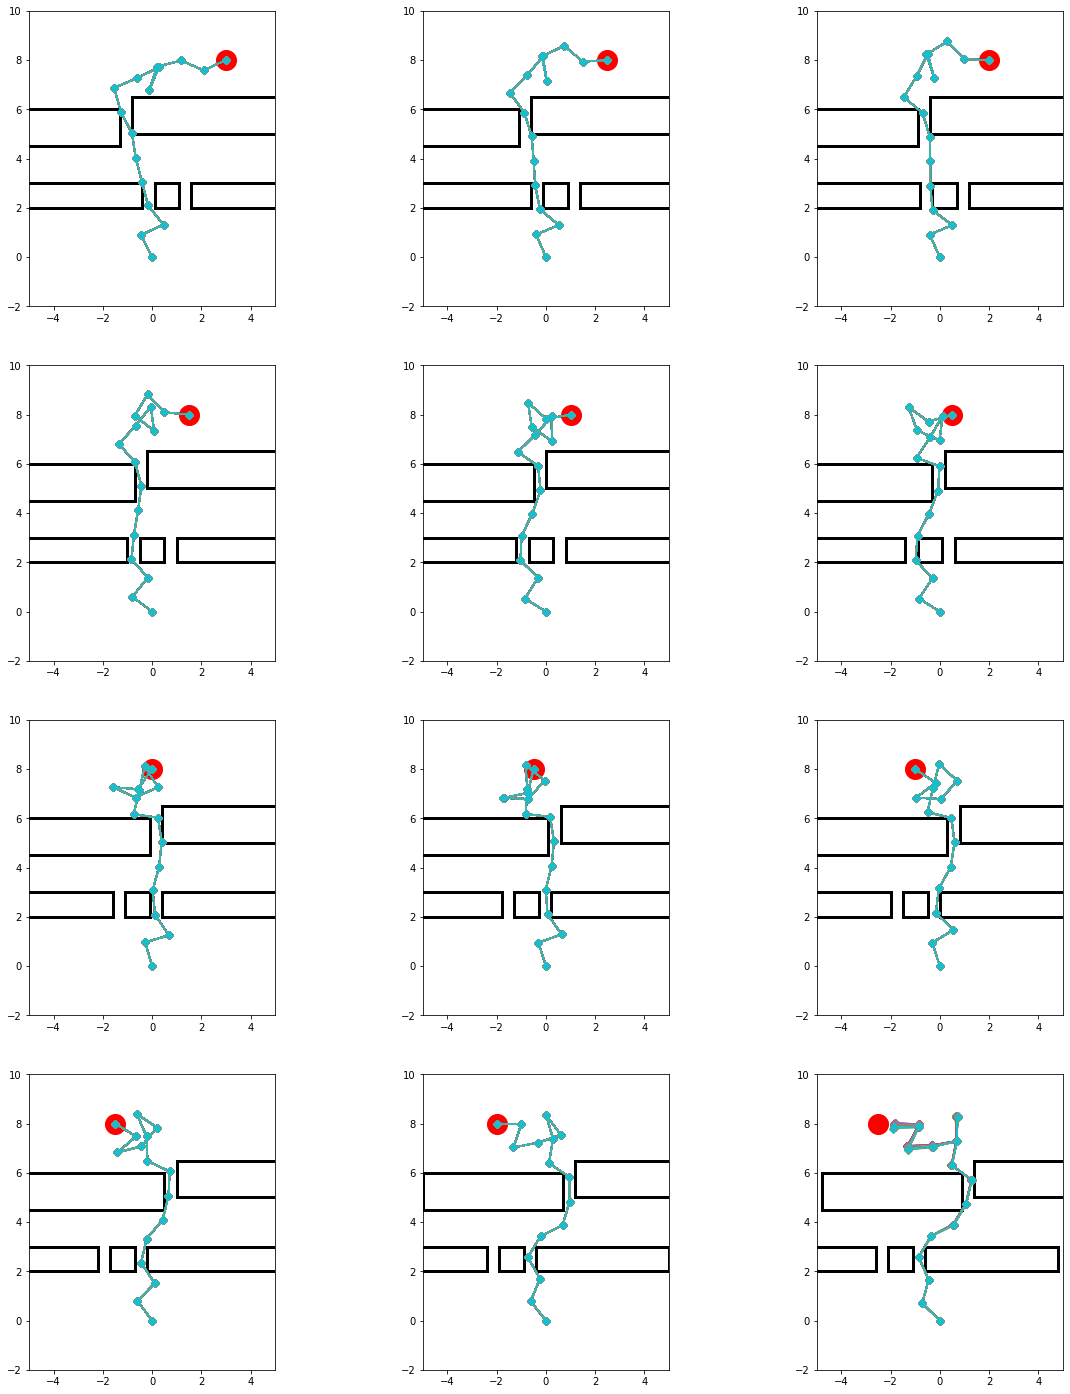

In [52]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

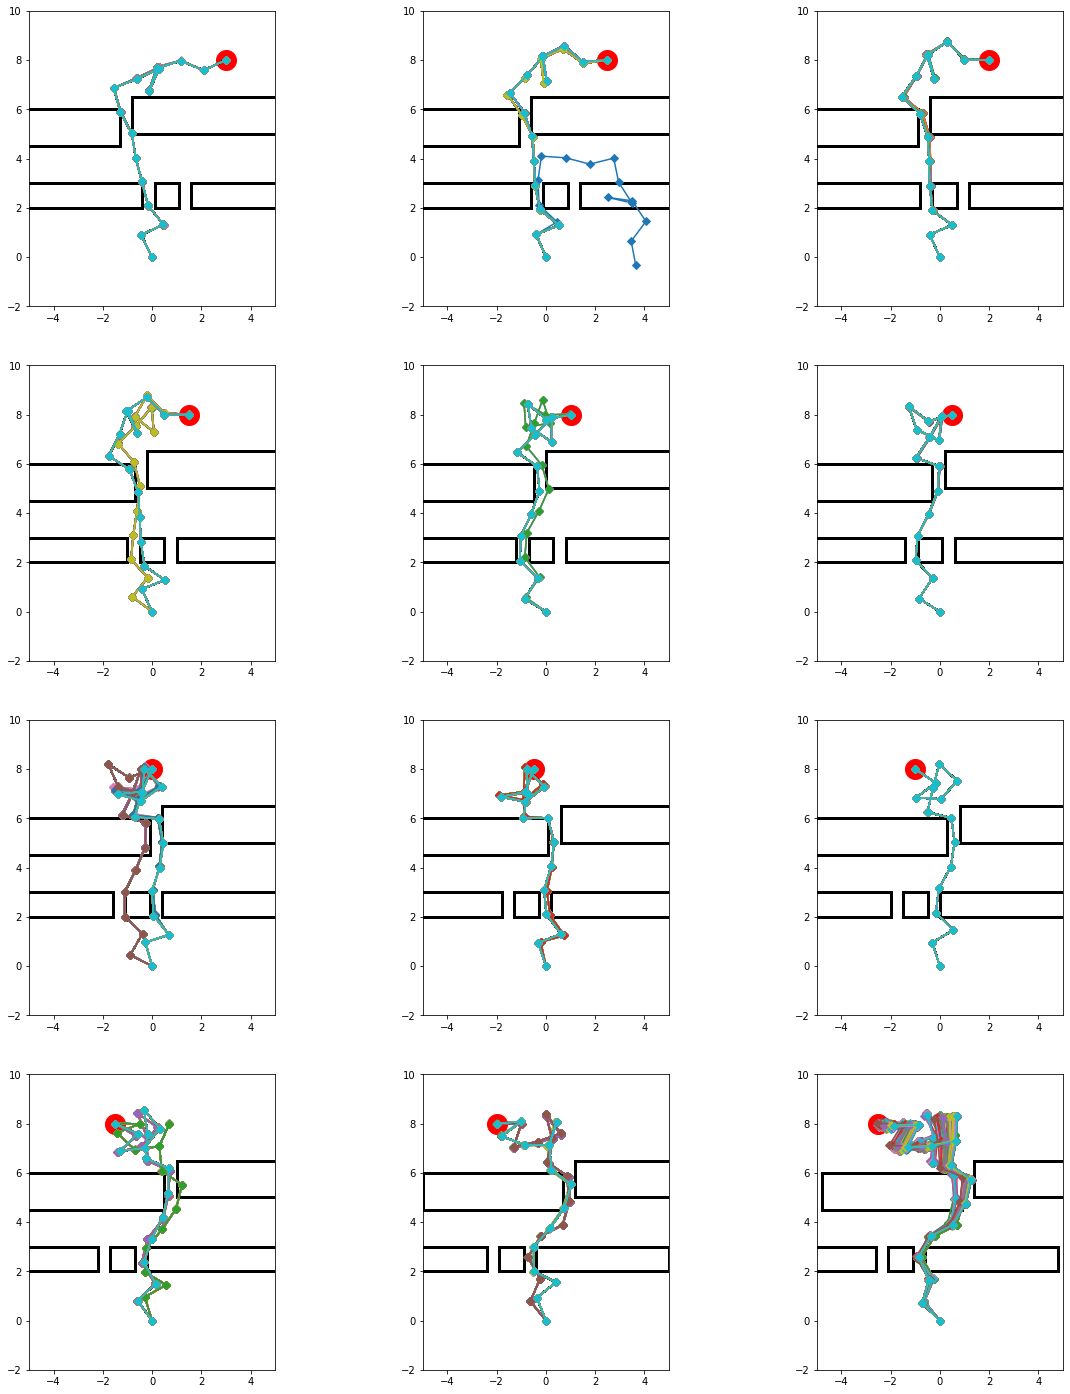

In [53]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

In [54]:
rectangles = [((i - 0.25, 5), (i + 1.25, 7)) for i in range(-9, 10, 2)] + [((i - 0.25, 2), (i + 1.25, 3)) for i in range(-9, 10, 2)]
rectangle_vs = [(-0.4, 0)] * (len(rectangles) // 2) + [(0.4, 0)] * (len(rectangles) // 2)
target = (3., 8.5)
target_v = (-0.5, -0.1)
S = [1.] * 15
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 100
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.1
num_iterations_init = 160
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 120, best: [26.65628823], #infeasible: 480, best: [2.17626147 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t = vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 120, best: [2.12553632], #infeasible: 480, best: [0.00408503 1.        ]
Iteration 40, #feasible: 120, best: [1.84047619], #infeasible: 480, best: [2.16285364e-05 1.00000000e+00]
Iteration 60, #feasible: 120, best: [1.41445746], #infeasible: 480, best: [2.80784119e-06 1.00000000e+00]
Iteration 80, #feasible: 120, best: [0.35573848], #infeasible: 480, best: [3.55904382e-08 1.00000000e+00]
Iteration 100, #feasible: 120, best: [0.27166229], #infeasible: 480, best: [1.14234382e-08 1.00000000e+00]
Iteration 120, #feasible: 120, best: [0.10773555], #infeasible: 480, best: [9.84330173e-09 1.00000000e+00]
Iteration 140, #feasible: 120, best: [0.03411464], #infeasible: 480, best: [9.46874324e-09 1.00000000e+00]
Iteration 159, #feasible: 120, best: [0.00638924], #infeasible: 480, best: [6.08245394e-09 1.00000000e+00]
t=1
Iteration 0, #feasible: 87, best: [42.95713183], #infeasible: 513, best: [0.00309168 1.        ]
Iteration 20, #feasible: 120, best: [0.00606771], #infe

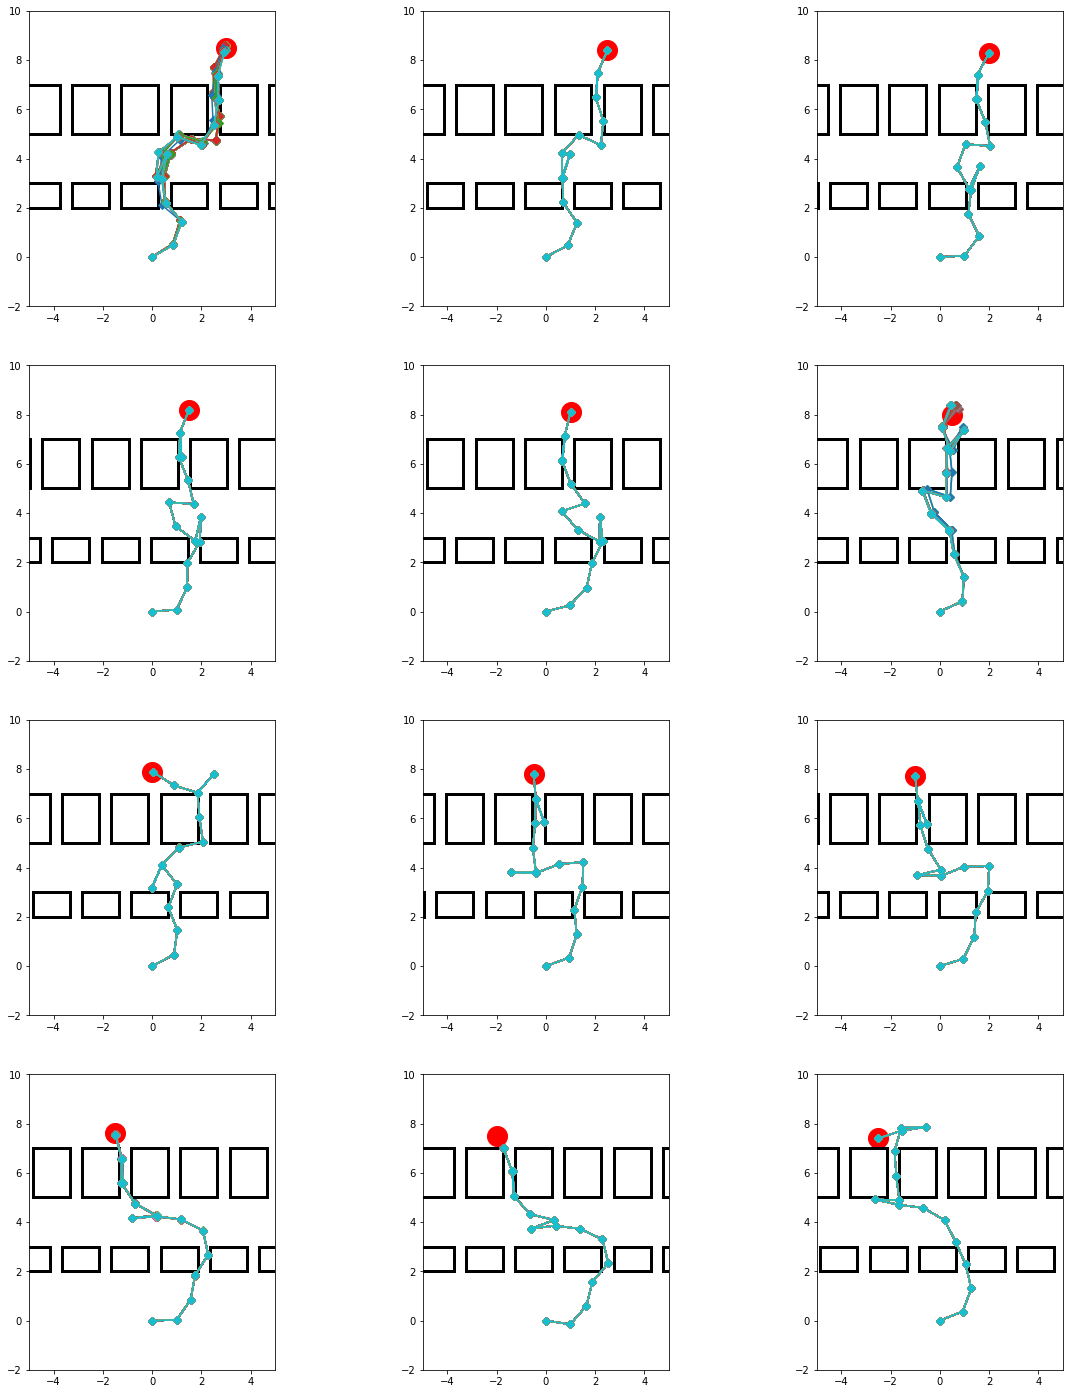

In [55]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

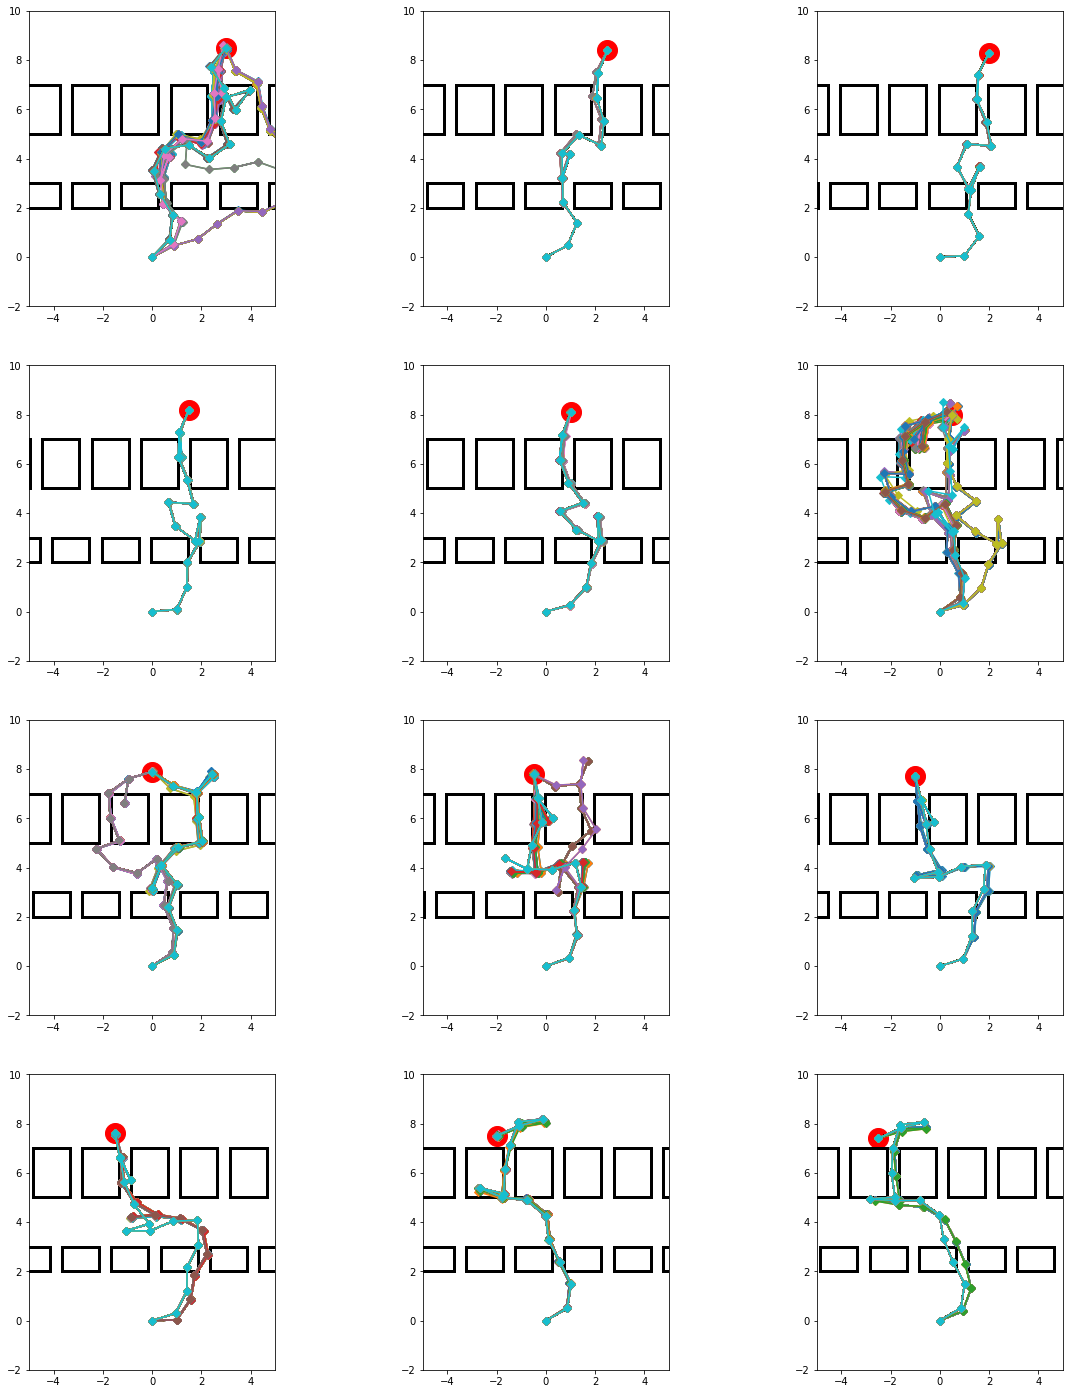

In [56]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))